In [1]:
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(harmony))
suppressMessages(library(dplyr))
suppressMessages(library(cowplot))
suppressMessages(library(harmony))
suppressMessages(library(Nebulosa))
suppressMessages(library(ggpubr))
suppressMessages(library(Ipaper))
suppressMessages(library(ComplexHeatmap))

In [2]:
set.seed(42)
getwd()

[1] "/data/scATA/SingleCellOpenChromatin/local/VisiumHeartRevision/IntegrativeAnalysis/Lymphoid/code"

In [3]:
coembed <- readRDS("../data/coembed/coembed.annotation.Rds")
coembed

An object of class Seurat 
159644 features across 3473 samples within 3 assays 
Active assay: RNA (28933 features, 2000 variable features)
 2 other assays present: peaks, GeneActivity
 5 dimensional reductions calculated: pca, umap, harmony, umap_harmony, umap_harmony_v2

In [4]:
## load HCA data
suppressMessages(library(SeuratData))
suppressMessages(library(SeuratDisk))

Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning me

In [5]:
Convert("../../../heart_cell_atlas/hca_heart_immune_raw.h5ad", dest = "h5seurat", overwrite = TRUE)

Warning message:
“Unknown file type: h5ad”
Warning message:
“'assay' not set, setting to 'RNA'”
Creating h5Seurat file for version 3.1.5.9900

Adding X as data

Adding X as counts

Adding meta.features from var

Adding X_pca as cell embeddings for pca

Adding X_scnym as cell embeddings for scnym

Adding X_umap as cell embeddings for umap

Adding cell_states_colors to miscellaneous data

Adding scNym_colors to miscellaneous data

Adding scNym_probabilities to miscellaneous data



In [6]:
obj.hca <- LoadH5Seurat("../../../heart_cell_atlas/hca_heart_immune_raw.h5seurat")

Validating h5Seurat file

Initializing RNA with data

Adding counts for RNA

Adding feature-level metadata for RNA

Adding reduction pca

Adding cell embeddings for pca

Adding miscellaneous information for pca

Adding reduction scnym

Adding cell embeddings for scnym

Adding miscellaneous information for scnym

Adding reduction umap

Adding cell embeddings for umap

Adding miscellaneous information for umap

Adding command information

Adding cell-level metadata

Adding miscellaneous information

Adding tool-specific results



In [7]:
obj.hca

An object of class Seurat 
33538 features across 40868 samples within 1 assay 
Active assay: RNA (33538 features, 0 variable features)
 3 dimensional reductions calculated: pca, scnym, umap

In [8]:
## only use relevant cell types for label transfering
unique(obj.hca$cell_states)

obj.hca.sub <- subset(obj.hca, cell_states %in% c("NK", "NKT", "CD4+T_cytox", "CD8+T_tem", "CD8+T_cytox",
                                                 "CD4+T_tem"))

obj.hca.sub@meta.data$cell_states_merge <- stringr::str_replace_all(obj.hca.sub@meta.data$cell_states,
                                                                   c("CD4\\+T_cytox" = "CD4",
                                                                    "CD4\\+T_tem" = "CD4",
                                                                    "CD8\\+T_tem" = "CD8",
                                                                    "CD8\\+T_cytox" = "CD8"))

unique(obj.hca.sub@meta.data$cell_states_merge)

[1] CD4+T_cytox doublets    DOCK4+MØ1   Mast        LYVE1+MØ2   LYVE1+MØ3  
 [7] CD8+T_tem   NK          NKT         CD8+T_cytox DC          Mo_pi      
[13] CD16+Mo     CD4+T_tem   B_cells     LYVE1+MØ1   MØ_AgP      Mo_classic 
[19] DOCK4+MØ2   MØ_mod      IL17RA+Mo   NØ         
22 Levels: NK CD16+Mo DOCK4+MØ1 CD4+T_cytox LYVE1+MØ1 CD8+T_tem ... IL17RA+Mo

[1] "CD4" "CD8" "NK"  "NKT"

In [9]:
obj.hca.sub <- obj.hca.sub %>% 
        NormalizeData() %>%
        FindVariableFeatures() %>%
        ScaleData() %>%
    RunUMAP(dims = 1:30, verbose = FALSE)

Centering and scaling data matrix

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


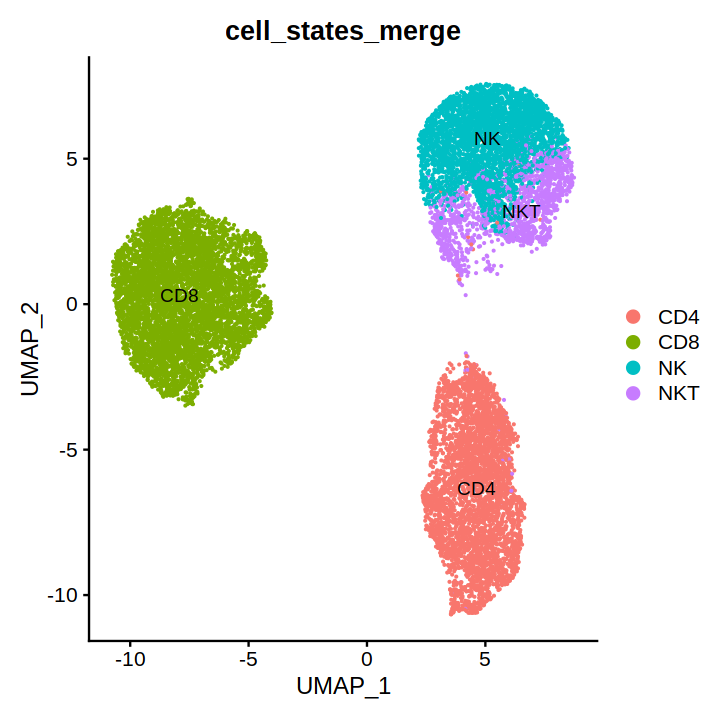

In [10]:
options(repr.plot.height = 6, repr.plot.width = 6)

DimPlot(obj.hca.sub, group.by = "cell_states_merge", label = TRUE)

In [11]:
Idents(obj.hca.sub) <- "cell_states_merge"

all.markers <- FindAllMarkers(obj.hca.sub, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
    
df <- all.markers %>%
    group_by(cluster) %>%
    slice_max(n = 10, order_by = avg_log2FC)

head(all.markers)

Calculating cluster CD4

Calculating cluster CD8

Calculating cluster NK

Calculating cluster NKT



,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
LTB,0.000000e+00,2.1965785,0.401,0.138,0.000000e+00,CD4,LTB
IL7R,6.090287e-258,1.1149559,0.519,0.230,2.042560e-253,CD4,IL7R
TRAC,9.687081e-136,0.9024849,0.448,0.250,3.248853e-131,CD4,TRAC
RPL13,5.170557e-128,0.9365008,0.683,0.675,1.734101e-123,CD4,RPL13
CD3D,9.864811e-114,0.6706773,0.482,0.278,3.308460e-109,CD4,CD3D
RPS2,1.711159e-94,0.8042914,0.664,0.661,5.738884e-90,CD4,RPS2


In [12]:
markerList <- split(all.markers, all.markers$cluster)
    
for(i in 1:length(markerList)){
        markerList[[i]] <- markerList[[i]][order(-markerList[[i]]$avg_log2FC), ]
}
    
WriteXLS::WriteXLS(markerList,
                   ExcelFileName = glue::glue("../data/coembed/MarkerGenesOfHCA.xlsx"),
                   SheetNames = names(markerList))

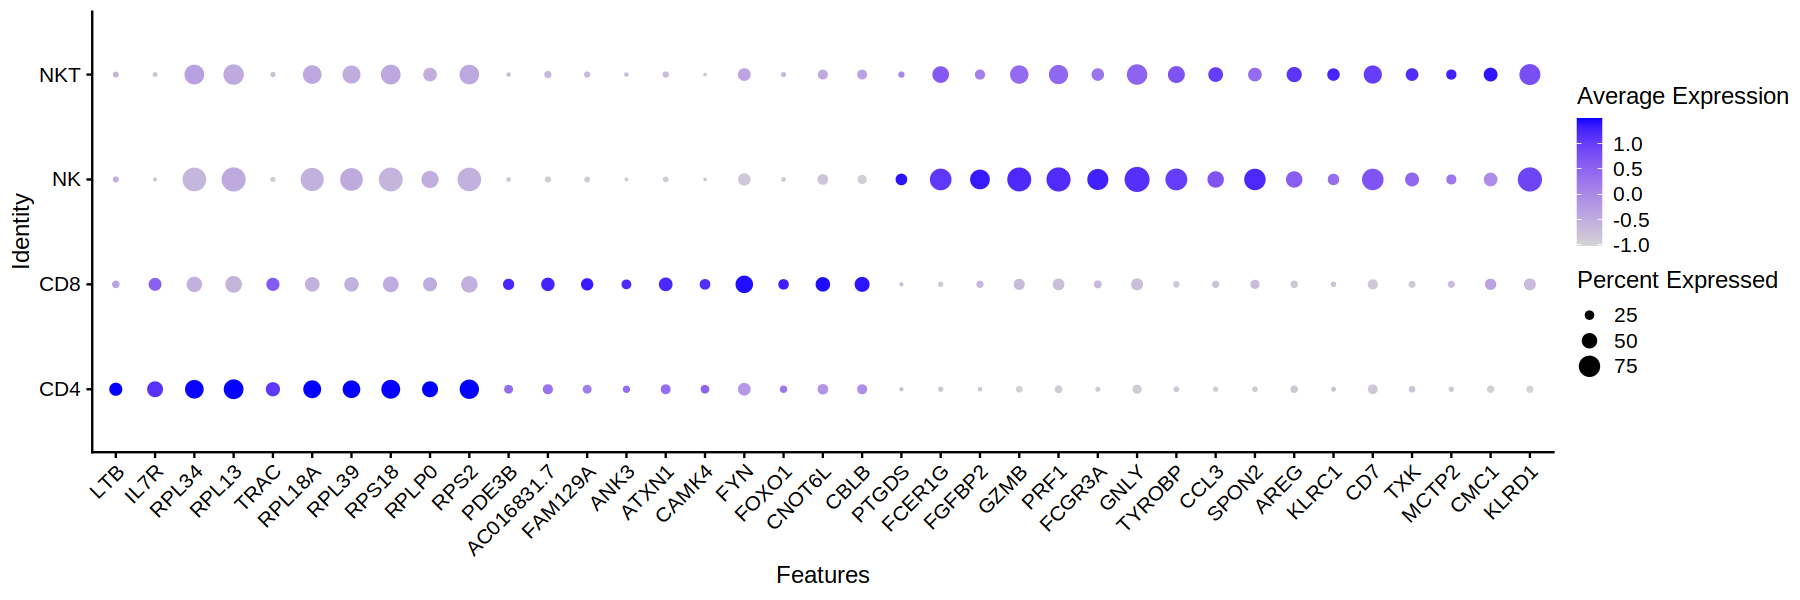

In [13]:
p <- DotPlot(obj.hca.sub, features = unique(df$gene)) + RotatedAxis()
    
options(repr.plot.height = 5, repr.plot.width = 15)

print(p)

In [14]:
all.markers.sub <- all.markers %>%
            subset(p_val_adj < 0.05 & avg_log2FC > 1) %>%
            subset(., select = c("cluster", "gene"))

rownames(all.markers.sub) <- NULL

# convert dataframe to list for module score calculation
all.markers.sub <- split(all.markers.sub, all.markers.sub$cluster)
for(cl in names(all.markers.sub)){
           all.markers.sub[[cl]] <- all.markers.sub[[cl]]$gene 
}

coembed <- AddModuleScore(coembed, all.markers.sub, assay = "RNA")

Warning message:
“The following features are not present in the object: FAM129A, not searching for symbol synonyms”


In [15]:
head(coembed@meta.data)

,orig.ident,nCount_peaks,nFeature_peaks,Sample,Clusters,region,patient,patient_region_id,patient_group,nCount_GeneActivity,⋯,RNA_snn_res.0.6,RNA_snn_res.0.7,RNA_snn_res.0.8,RNA_snn_res.0.9,RNA_snn_res.1,annotation,Cluster1,Cluster2,Cluster3,Cluster4
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
CK171#TCACCACAGCCATCAT-1,CK171,6128,3384,CK171,C4,RZ/BZ,P2,RZ/BZ_P2,group_1,7948.874,⋯,0,0,3,3,3,CD4,0.34701776,0.3961208,-0.06678588,-0.16012768
CK171#GAGACTTGTAAGCCGA-1,CK171,2342,1357,CK171,C4,RZ/BZ,P2,RZ/BZ_P2,group_1,7762.757,⋯,0,0,3,3,3,CD4,0.53262989,0.5771962,-0.05804814,-0.13990694
CK171#GACCCAGCATTTAGGC-1,CK171,6002,3206,CK171,C3,RZ/BZ,P2,RZ/BZ_P2,group_1,8105.889,⋯,1,1,0,1,1,CD8,-0.17265653,0.5345749,-0.03262768,-0.06482598
CK171#AAGGTTCGTCGCTACG-1,CK171,2809,1580,CK171,C3,RZ/BZ,P2,RZ/BZ_P2,group_1,8007.349,⋯,1,1,0,1,1,CD8,-0.21440898,0.5985126,-0.03930575,-0.17882593
CK171#AATGGCTGTTACGAAA-1,CK171,3638,2026,CK171,C4,RZ/BZ,P2,RZ/BZ_P2,group_1,7806.442,⋯,0,0,2,2,2,CD4,0.67322951,0.6592872,-0.03597381,-0.18691314
CK171#AAAGATGAGCCTGTAT-1,CK171,6064,3303,CK171,C3,RZ/BZ,P2,RZ/BZ_P2,group_1,8176.378,⋯,1,1,0,1,1,CD8,-0.06421715,0.6715884,-0.01741312,-0.18749050


In [16]:
names(all.markers.sub)

[1] "CD4" "CD8" "NK"  "NKT"

In [17]:
colnames(coembed@meta.data) <- stringr::str_replace_all(colnames(coembed@meta.data),
                                                       c("Cluster1" = "CD4",
                                                        "Cluster2" = "CD8",
                                                        "Cluster3" = "NK",
                                                        "Cluster4" = "NKT"))

Warning message:
“The following variables were found in both object metadata and the default assay: CD4
Returning metadata; if you want the feature, please use the assay's key (eg. RNA_CD4)”


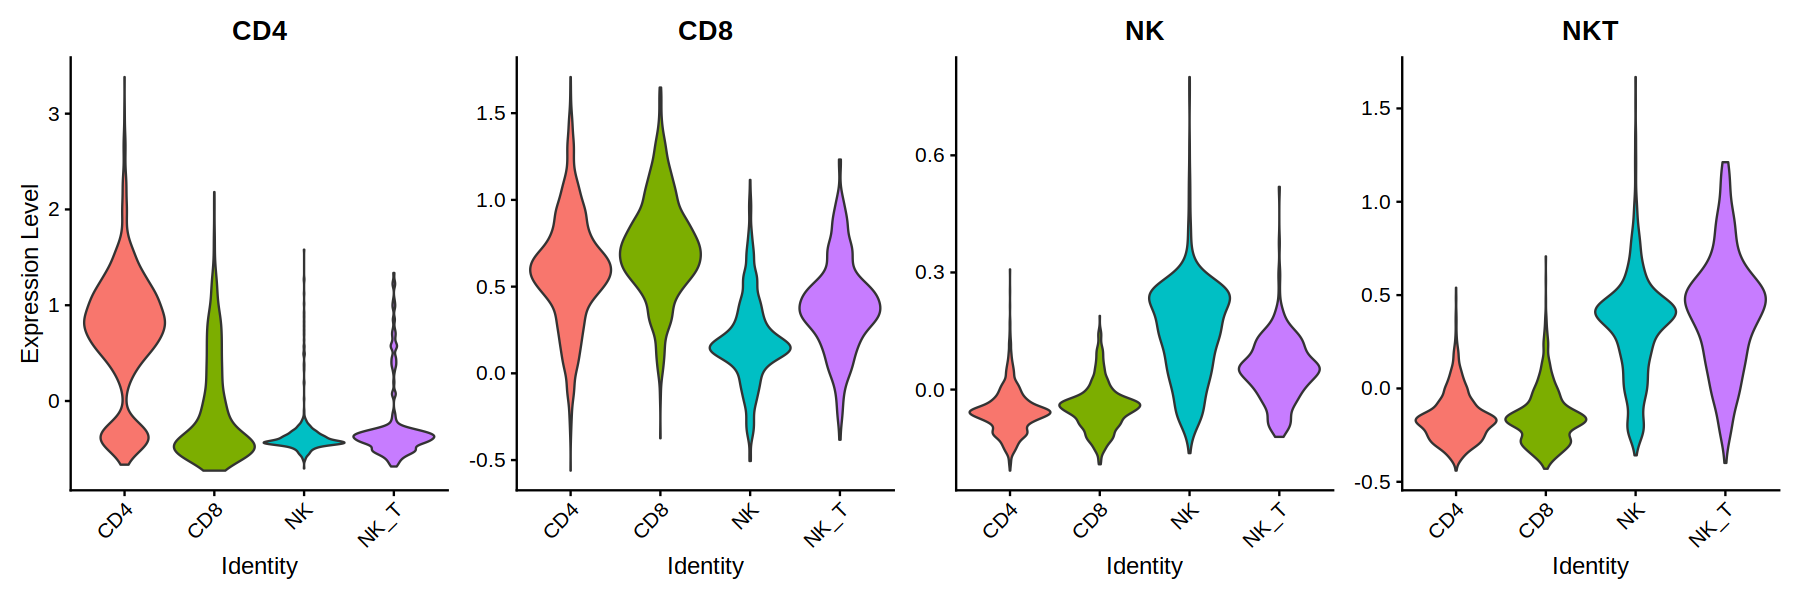

In [27]:
options(repr.plot.height = 5, repr.plot.width = 15)

VlnPlot(coembed, feature = c("CD4", "CD8", "NK", "NKT"), pt.size = 0, ncol = 4)

#FeaturePlot(coembed, feature = c("CD4", "CD8", "NK", "NKT"), reduction = "umap_harmony_v2", ncol = 2,
#           min.cutoff = "q10", max.cutoff = "q90")

In [19]:
# obj.rna <- subset(coembed, tech == "RNA")

In [20]:
# gene.use <- intersect(rownames(obj.hca.sub), rownames(obj.rna))

In [21]:
# transfer.anchors <- FindTransferAnchors(reference = obj.hca.sub,
#                                         query = obj.rna,
#                                         features = gene.use,
#                                         reference.assay = "RNA",
#                                         query.assay = "RNA",
#                                         reduction = "cca")

# predictions <- TransferData(anchorset = transfer.anchors, refdata = obj.hca.sub$cell_states,
#                             dims = 1:30, weight.reduction = obj.rna[["harmony"]])

# obj.rna <- AddMetaData(obj.rna, metadata = predictions)

In [22]:
# p1 <- DimPlot(obj.rna, reduction = "umap_harmony_v2", group.by = "annotation", label = TRUE, label.size = 5) + 
# ggtitle("annotations")

# p2 <- DimPlot(obj.rna, reduction = "umap_harmony_v2", group.by = "predicted.id", label = TRUE, label.size = 5) + 
# ggtitle("predicted labeles")

# options(repr.plot.height = 6, repr.plot.width = 15)

# p1 + p2

In [23]:
# ArchR::confusionMatrix(obj.rna$annotation, obj.rna$predicted.id)

In [24]:
# # compare at pseudo-bulk level
# Idents(obj.rna) <- "annotation"
# pseudo_coembed_rna <- AverageExpression(obj.rna)$RNA
# head(pseudo_coembed_rna)

In [25]:
# # compare at pseudo-bulk level
# Idents(obj.hca.sub) <- "cell_states"
# pseudo_hca_rna <- AverageExpression(obj.hca.sub)$RNA
# head(pseudo_hca_rna)

# gene.use <- intersect(rownames(obj.rna), rownames(pseudo_hca_rna))
# length(gene.use)

# pseudo_coembed_rna <- pseudo_coembed_rna[gene.use, ]
# pseudo_hca_rna <- pseudo_hca_rna[gene.use, ]

# correlation <- cor(pseudo_coembed_rna, pseudo_hca_rna, method = "spearman")
# correlation <- na.omit(correlation)

# correlation

# p <- Heatmap(correlation)

# p